# Lesson 5 Assignment - Automobile Price Hypothesis Testing
## Author - Natalie Moore

In [32]:
#importing necessary packages
import pandas as pd
import numpy as np
from numpy import matlib
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm
import scipy
import statsmodels.stats.power as smsp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
    
%matplotlib inline

In [2]:
#Reading in the Auto Price data
def read_auto_data(fileName = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Automobile%20price%20data%20_Raw_.csv"):
    'Function to load the auto price data set from a .csv file' 

    ## Read the .csv file with the pandas read_csv method
    auto_price = pd.read_csv(fileName)
    
    ## Remove rows with missing values, accounting for missing values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_price.loc[auto_price[column] == '?', column] = np.nan
    auto_price.dropna(axis = 0, inplace = True)

    ## Convert some columns to numeric values
    for column in cols:
        auto_price[column] = pd.to_numeric(auto_price[column])
        
    return auto_price
auto_price = read_auto_data()

#creating the 'log price' column for this assignment
auto_price['log price'] = np.log(auto_price['price'])

In [3]:
auto_price.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,log price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385,9.349624
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093,0.508971
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,8.540519
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000,8.956284
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000,9.234545
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000,9.711661
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,10.723267


In [4]:
auto_price.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,log price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,9.510075
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,9.711116
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,9.711116
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,9.543235
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,9.767095


In [5]:
auto_price.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,log price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,9.731809
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,9.854560
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,9.975110
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,22470,10.019936
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,19,25,22625,10.026811


In [6]:
print (auto_price.shape)
print (auto_price.dtypes)

(195, 27)
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
log price            float64
dtype: object


## 1. Compare/test the normality of the distributions of 'price' / 'log price':

Text(0.5,1,'Figure 1')

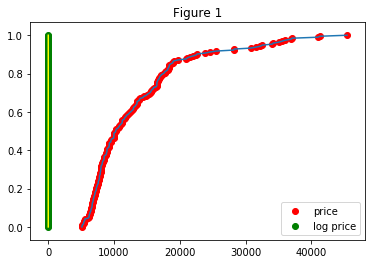

In [7]:
#Defining the function to plot the CDFs of our given distributions, 'price' and 'log price'
def plot_cums(dist1, dist2):
    ## sort the first data sample:
    data_sorted = np.sort(dist1)
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)

    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p)
    plt.scatter(data_sorted, p, color = 'red', label='price')
    
    # sort the seond data sample:
    data_sorted = np.sort(dist2)
    
    # And the second plot
    plt.plot(data_sorted, p, color = 'yellow')
    plt.scatter(data_sorted, p, color = 'green', label='log price')
    
    plt.legend()

plot_cums(auto_price['price'], auto_price['log price']) 
plt.title('Figure 1')

Above is the CDF plot of both the 'price' and 'log price' columns. Since they both have massively different scales ('price' being much larger), the 'log price' CDF is virtually verticle. Both will need to be scaled in order to truly compare their CDFs.

C:\Users\natal\AnacondaNEW\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Text(0.5,1,'Figure 2')

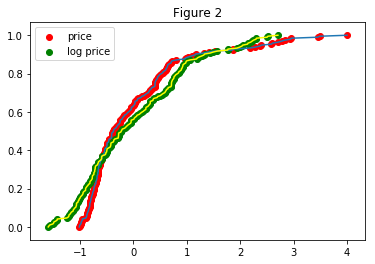

In [8]:
from sklearn.preprocessing import scale
price_s = scale(auto_price['price'])
logprice_s = scale(auto_price['log price'])
plot_cums(price_s, logprice_s)  
plt.title('Figure 2')

Above is the CDF plot of both the 'price' and the 'log price' columns, scaled this time. It is now apparent that both CDFs are similar and from the same distribution (remember that 'log price' is just the log version of the 'price' column). Still, even with the similarities there is still deviations between both CDF curves.

In [9]:
#Defining the function to perform the K-S Test for a normal distribution
def ks_test(dat, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic = ' + str(ks_statisic))
    print('P-value = ' + str(pvalue))    

In [10]:
#Performing the K-S Test on our scaled 'log price' column
ks_test(logprice_s)

KS-statistic = 0.10295537216792472
P-value = 0.029757993611015943


In [11]:
#Performing the K-S Test on our scaled 'price' column
ks_test(price_s)

KS-statistic = 0.15672300254932997
P-value = 0.00011937821625407352


Above are both K-S Tests for the scaled 'price' and 'log price' columns, assuming a normal distribution. As you can see, the KS-statistic and P-value are quite low for both tests. This suggests that the distance between both distributions (either 'price' or 'log price' and the normal distribution) is small, AND that there is a low chance the differences are from random sampling error. From this evidence it is clear that neither 'price' or 'log price' are perfectly modeled with the normal distribution. However, the p-value is much larger for 'log price' so I belive that distribution is closer to a normal one.

C:\Users\natal\AnacondaNEW\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\natal\AnacondaNEW\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Figure 3')

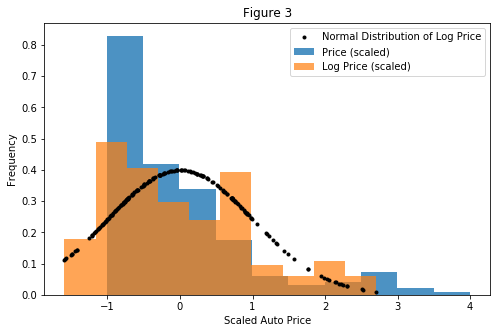

In [12]:
#creating the fit for a normal distribution based on log price
fit_ls = ss.norm.pdf(logprice_s, np.mean(logprice_s), np.std(logprice_s))

#Plotting Figure 1
plt.figure(figsize=(8,5))

plt.hist(price_s,normed=True,alpha=.8,label='Price (scaled)')
plt.hist(logprice_s,normed=True,alpha=.7,label='Log Price (scaled)')
plt.plot(logprice_s,fit_ls,'.',color='black',label='Normal Distribution of Log Price')

plt.legend()
plt.xlabel('Scaled Auto Price')
plt.ylabel('Frequency')
plt.title('Figure 3')

Above is a histogram of both the scaled 'price' and 'log price' columns. Since they both have the same number of points, it's clear that the 'log price' column is just distributed differently than the 'price' column. The 'price' column also looks more skewed than 'log price'. Overlayed is the normalized distribution of the 'log price' column, which shows how the 'log price' column is a better fit for a normal distribution, as we saw from the K-S Tests above.

## 2. Test significance of **log price** stratified by:
### a) **fuel type**

In [13]:
#defining the function to stratify my auto_price data by different groups
def stratify(dat, p):
    groups = dat.groupby(group) # Create the groups
    nums = min(groups.size()) # Find the size of the smallest group
    p = nums / dat.shape[0]
    num = int(p * dat.shape[0]) # Compute the desired number of samples per group
    if num <= nums: # If sufficient group size, sample each group and return. 
        return groups.apply(lambda x: x.sample(n=num))
    else: # Oops. p is to large
        pmax = nums / dat.shape[0]
        print('The maximum value of p = ' + str(pmax))

In [14]:
#my stratified dataframe based on fuel-type
p = .1 #found from trial and error
group = 'fuel-type'

strat_fueltype = stratify(auto_price, p)
strat_fueltype = pd.DataFrame(strat_fueltype)
strat_fueltype = strat_fueltype[['fuel-type','log price']]
strat_fueltype

fuel-type  log price
fuel-type                         
diesel    67     diesel  10.148471
          112    diesel   9.735069
          114    diesel   9.745371
          203    diesel  10.019936
          158    diesel   8.974365
          66     diesel   9.817058
          174    diesel   9.277812
          182    diesel   8.958669
          69     diesel  10.246226
          108    diesel   9.487972
          159    diesel   8.960339
          63     diesel   9.286838
          90     diesel   8.867709
          116    diesel   9.795345
          187    diesel   9.158521
          68     diesel  10.248778
          110    diesel   9.536762
          70     diesel  10.360912
          184    diesel   8.986572
          192    diesel   9.535679
gas       204       gas  10.026811
          73        gas  10.620351
          109       gas   9.428672
          17        gas  10.515425
          139       gas   8.861208
          14        gas  10.109078
          166       gas   9.163039
          188       gas   9.209840
          35        gas   8.894944
          0         gas   9.510075
          102       gas   9.574914
          124       gas   9.454384
          98        gas   9.017847
          79        gas   8.947546
          148       gas   8.988821
          133       gas   9.406729
          99        gas   9.099297
          143       gas   9.206332
          100       gas   9.164192
          75        gas   9.711297

In [15]:
#Using ANOVA to find the F statistic and P-value 
gas = strat_fueltype['gas':'log price']['log price']
diesel = strat_fueltype['diesel':'log price']['log price']

f_statistic, p_value = ss.f_oneway(gas, diesel)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 0.16357439376352098
P-value = 0.6873743845123813


C:\Users\natal\AnacondaNEW\lib\site-packages\pandas\plotting\_core.py:2666: FutureWarning: 'fuel-type' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(by)


Text(0.5,1,'Figure 4')

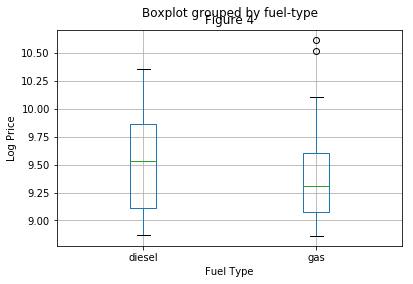

In [16]:
strat_fueltype.boxplot(by = ['fuel-type'])
plt.ylabel('Log Price')
plt.xlabel('Fuel Type')
plt.title('Figure 4')

As you can see above, we used ANOVA to calculate the F stat and P-value for the stratified 'gas' and 'diesel' groups in the autoprice dataframe and produced a box plot of their spans. Here, the low F statistic shows that the difference in the variance between gas and diesel is fairly low and the high P-value shows that the differences present are likely to be from random chance. These results indicate that there is not a significant difference in log price between gas and diesel cars.

Furthermore, Figure 4 shows the IQR of both the diesel and gas stratified samples. Both IQRs overlap each other and the medians are fairly close together visually.

### b) **aspiration**

In [17]:
#my stratified dataframe based on aspiration
p = .18 #found from trial and error
group = 'aspiration'

strat_aspiration = stratify(auto_price, p)
strat_aspiration = pd.DataFrame(strat_aspiration)
strat_aspiration = strat_aspiration[['aspiration','log price']]
strat_aspiration

aspiration  log price
aspiration                          
std        41         std   9.468465
           191        std   9.495143
           159        std   8.960339
           19         std   8.747511
           60         std   9.047233
           22         std   8.760453
           38         std   9.115480
           10         std   9.706864
           0          std   9.510075
           160        std   8.953899
           54         std   8.908559
           102        std   9.574914
           195        std   9.504129
           71         std  10.439513
           13         std   9.957265
           162        std   9.133243
           62         std   9.234545
           51         std   8.715224
           170        std   9.323580
           154        std   8.974365
           3          std   9.543235
           91         std   8.802222
           140        std   8.936298
           169        std   9.209240
           194        std   9.468079
           88         std   9.135509
           178        std   9.714625
           26         std   8.937087
           34         std   8.871926
           49         std  10.491274
...                   ...        ...
turbo      116      turbo   9.795345
           201      turbo   9.854560
           203      turbo  10.019936
           67       turbo  10.148471
           87       turbo   9.135509
           23       turbo   8.981807
           110      turbo   9.536762
           83       turbo   9.607034
           8        turbo  10.080587
           149      turbo   9.366831
           136      turbo   9.806426
           108      turbo   9.487972
           119      turbo   8.981807
           29       turbo   9.469932
           82       turbo   9.443751
           192      turbo   9.535679
           112      turbo   9.735069
           84       turbo   9.581145
           114      turbo   9.745371
           145      turbo   9.328923
           174      turbo   9.277812
           75       turbo   9.711297
           79       turbo   8.947546
           117      turbo   9.806426
           198      turbo   9.821192
           105      turbo   9.888323
           70       turbo  10.360912
           27       turbo   9.054622
           69       turbo  10.246226
           204      turbo  10.026811

[72 rows x 2 columns]

In [18]:
#Using ANOVA to find the F statistic and P-value 
std = strat_aspiration['std':'std']['log price']
turbo = strat_aspiration['turbo':'turbo']['log price']

f_statistic, p_value = ss.f_oneway(std, turbo)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 12.12196511587657
P-value = 0.0008627122745995996


C:\Users\natal\AnacondaNEW\lib\site-packages\pandas\plotting\_core.py:2666: FutureWarning: 'aspiration' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(by)


Text(0.5,1,'Figure 5')

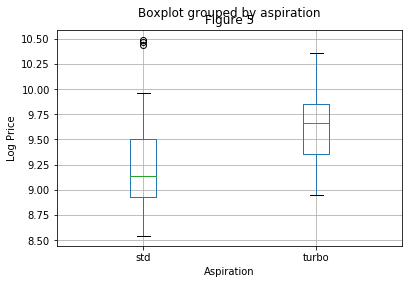

In [19]:
strat_aspiration.boxplot(by = ['aspiration'])
plt.ylabel('Log Price')
plt.xlabel('Aspiration')
plt.title('Figure 5')

As you can see above, we used ANOVA to calculate the F stat and P-value for the stratified 'std' and 'turbo' groups in the autoprice dataframe and produced a box plot of their spans. Here, the high F statistic shows that the difference in the variance between gas and diesel is large and the extremely low P-value shows that the differences present are very unlikely to be from random chance. These results indicate that there is a significant difference in log price between turbo and standard aspiration cars.

Furthermore, Figure 5 shows the IQR of both the std and turbo stratified samples. Neither IQRs overlap each other much and the medians are fairly distant from each other visually.

### c) **rear vs. front wheel drive**

In [20]:
#my stratified dataframe based on drive-wheels
p = .04 #found from trial and error
group = 'drive-wheels'

strat_drivewheels = stratify(auto_price, p)
strat_drivewheels = pd.DataFrame(strat_drivewheels)
strat_drivewheels = strat_drivewheels[['drive-wheels','log price']]
strat_drivewheels

drive-wheels  log price
drive-wheels                            
4wd          148          4wd   8.988821
             149          4wd   9.366831
             140          4wd   8.936298
             154          4wd   8.974365
             145          4wd   9.328923
             144          4wd   9.130539
             155          4wd   9.080004
             4            4wd   9.767095
fwd          95           fwd   8.961751
             8            fwd  10.080587
             138          fwd   8.540519
             133          fwd   9.406729
             143          fwd   9.206332
             51           fwd   8.715224
             161          fwd   9.030974
             185          fwd   9.011279
rwd          111          rwd   9.653743
             107          rwd   9.384294
             47           rwd  10.381273
             169          rwd   9.209240
             72           rwd  10.464702
             181          rwd   9.664596
             110          rwd   9.536762
             165          rwd   9.137555

In [21]:
#Using ANOVA to find the F statistic and P-value 
fwd = strat_drivewheels['fwd':'fwd']['log price']
rwd = strat_drivewheels['rwd':'rwd']['log price']

f_statistic, p_value = ss.f_oneway(fwd, rwd)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = 5.336394602797808
P-value = 0.03664393201342631


C:\Users\natal\AnacondaNEW\lib\site-packages\pandas\plotting\_core.py:2666: FutureWarning: 'drive-wheels' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(by)


Text(0.5,1,'Figure 6')

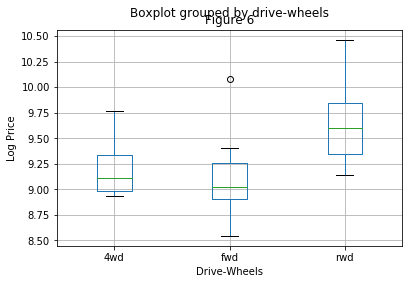

In [22]:
strat_drivewheels.boxplot(by = ['drive-wheels'])
plt.ylabel('Log Price')
plt.xlabel('Drive-Wheels')
plt.title('Figure 6')

As you can see above, we used ANOVA to calculate the F stat and P-value for the stratified 'fwd' and 'rwd' groups in the autoprice dataframe and produced a box plot of their spans. Here, the fairly high F statistic shows that the difference in the variance between gas and diesel is large and the fairly low P-value shows that the differences present are unlikely to be from random chance. These results indicate that there is a significant difference in log price between turbo and standard aspiration cars.

Furthermore, Figure 6 shows the IQR of both the rwd and fwd stratified samples. Neither IQRs overlap each other much and the medians are fairly distant from each other visually.

## 3. Apply ANOVA and Tukey's HSD test to the auto price data to compare the **log price** of autos stratified by **body style**:

In [23]:
#my stratified dataframe based on body-style
p = .03 #found from trial and error
group = 'body-style'

strat_bodystyle = stratify(auto_price, p)
strat_bodystyle = pd.DataFrame(strat_bodystyle)
strat_bodystyle = strat_bodystyle[['body-style','log price']]
strat_bodystyle

body-style  log price
body-style                             
convertible 0    convertible   9.510075
            189  convertible   9.358329
            128  convertible  10.519430
            172  convertible   9.779567
            72   convertible  10.464702
            1    convertible   9.711116
hardtop     126      hardtop  10.389857
            69       hardtop  10.246226
            170      hardtop   9.323580
            168      hardtop   9.173573
            74       hardtop  10.723267
            127      hardtop  10.434939
hatchback   120    hatchback   8.736971
            177    hatchback   9.327946
            18     hatchback   8.546946
            164    hatchback   9.016513
            80     hatchback   9.206232
            169    hatchback   9.209240
sedan       92         sedan   8.831858
            11         sedan   9.736547
            194        sedan   9.468079
            85         sedan   8.852093
            5          sedan   9.632335
            54         sedan   8.908559
wagon       146        wagon   8.917713
            7          wagon   9.847975
            113        wagon   9.722865
            193        wagon   9.416541
            123        wagon   9.096163
            154        wagon   8.974365

C:\Users\natal\AnacondaNEW\lib\site-packages\pandas\plotting\_core.py:2666: FutureWarning: 'body-style' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(by)


Text(0.5,1,'Figure 7')

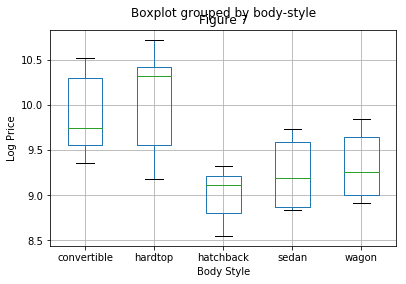

In [24]:
strat_bodystyle.boxplot(by = ['body-style'])
plt.ylabel('Log Price')
plt.xlabel('Body Style')
plt.title('Figure 7')

In [25]:
#Using ANOVA to find the F statistic and P-value 
convertible = strat_bodystyle['convertible':'convertible']['log price']
hardtop = strat_bodystyle['hardtop':'hardtop']['log price']
hatchback = strat_bodystyle['hatchback':'hatchback']['log price']
sedan = strat_bodystyle['sedan':'sedan']['log price']
wagon = strat_bodystyle['wagon':'hardtop']['log price']

f_statistic, p_value = ss.f_oneway(convertible, hardtop, hatchback, sedan, wagon)
print('F statistic = ' + str(f_statistic))
print('P-value = ' + str(p_value))

F statistic = nan
P-value = nan


C:\Users\natal\AnacondaNEW\lib\site-packages\scipy\stats\stats.py:2923: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


As you can see above, first we used ANOVA to calculate the F stat and P-value for the stratified bodystyle groups in the autoprice dataframe and produced a box plot of their spans. Here, the F statistic shows that the difference in the variance between gas and diesel may be large and the fairly low P-value shows that the differences present are unlikely to be from random chance. These results indicate that there may be a significant difference in log price between the bodystyle groups.

Next, we used Tukey's HSD test to calculate the upper and lower mean differences between each bodystyle group. The test determined that we cannot reject the null hypothesis that the log price means are the same between each group, which means our ANOVA test was not very confident. 

Furthermore, the two Tukey plots show a visual representation of the table produced from the Tukey HSD test.

## 4. Graphically explore the differences between the price conditioned by the categories of each variable:

In [28]:
p = 1 #to be replaced within the stratify function
group = ['make','num-of-doors','engine-location','engine-type','num-of-cylinders','fuel-system']

def stratify(dat, p):
    groups = dat.groupby(group[i]) # Create the groups
    nums = min(groups.size()) # Find the size of the smallest group
    p = nums / dat.shape[0]
    num = int(p * dat.shape[0]) # Compute the desired number of samples per group
    if num <= nums: # If sufficient group size, sample each group and return. 
        return groups.apply(lambda x: x.sample(n=num))
    else: # Oops. p is to large
        pmax = nums / dat.shape[0]
        print('The maximum value of p = ' + str(pmax))

for i in range(5):
    strat_var = stratify(auto_price, p)
    strat_var = pd.DataFrame(strat_var)
    strat_var = strat_var[[group[i],'price']]
    print (strat_var)


                            make  price
make                                   
alfa-romero   1      alfa-romero  16500
audi          6             audi  17710
bmw           14             bmw  24565
chevrolet     20       chevrolet   6575
dodge         23           dodge   7957
honda         38           honda   9095
isuzu         46           isuzu  11048
jaguar        48          jaguar  35550
mazda         62           mazda  10245
mercedes-benz 73   mercedes-benz  40960
mercury       75         mercury  16503
mitsubishi    78      mitsubishi   6669
nissan        93          nissan   7349
peugot        116         peugot  17950
plymouth      118       plymouth   5572
porsche       125        porsche  22018
saab          136           saab  18150
subaru        142         subaru   7775
toyota        160         toyota   7738
volkswagen    193     volkswagen  12290
volvo         202          volvo  21485
                 num-of-doors  price
num-of-doors                        
?     

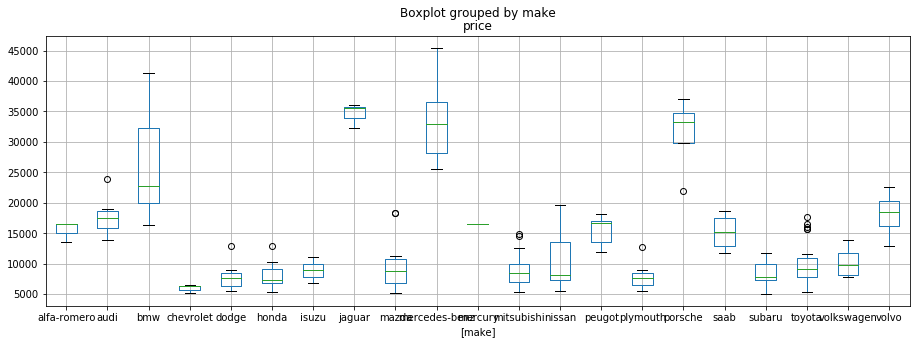

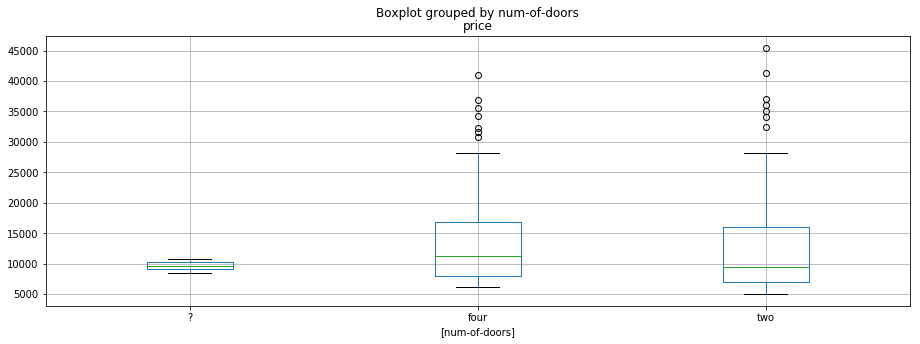

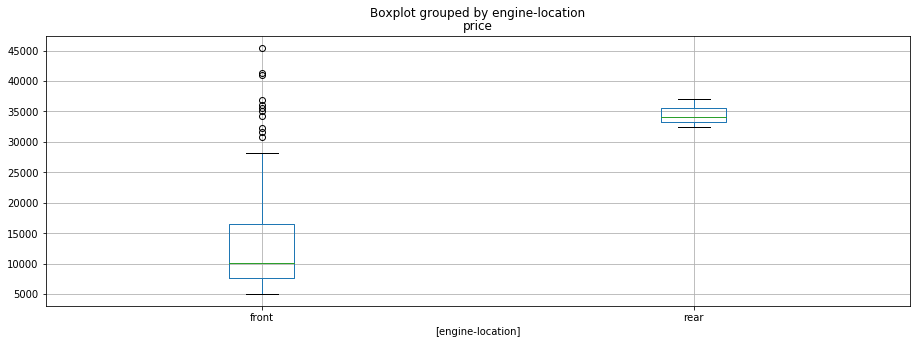

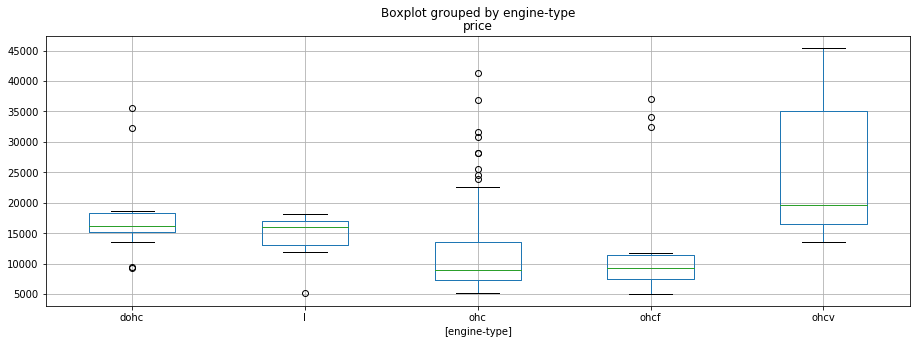

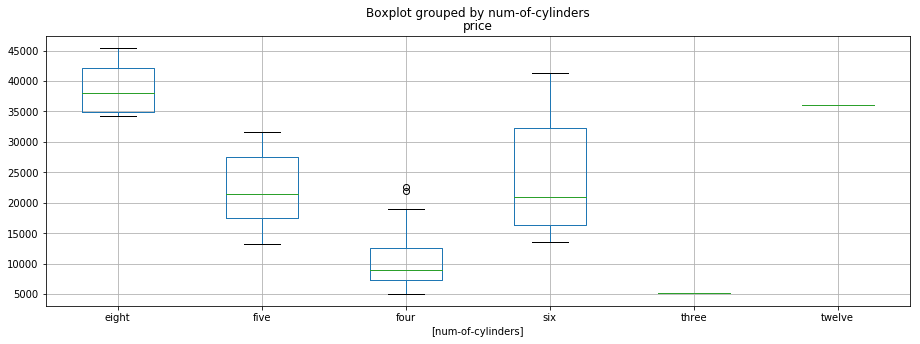

In [29]:
#plotting boxplots of the remaining categorical columns of the autoprice dataframe (against price)
for i in range(5):
    auto_price.loc[:,['price',group[i]]].boxplot(by = [group[i]], figsize=(15,5))
    plt.show()

In [30]:
auto_price.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,log price
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.794872,98.896410,174.256923,65.886154,53.861538,2559.000000,127.938462,3.329385,3.250308,10.194974,103.271795,5099.487179,25.374359,30.841026,13248.015385,9.349624
std,1.230612,6.132038,12.476443,2.132484,2.396778,524.715799,41.433916,0.271866,0.314115,4.062109,37.869730,468.271381,6.401382,6.829315,8056.330093,0.508971
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,8.540519
25%,0.000000,94.500000,166.300000,64.050000,52.000000,2145.000000,98.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.500000,25.000000,7756.500000,8.956284
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10245.000000,9.234545
75%,2.000000,102.400000,184.050000,66.900000,55.650000,2943.500000,145.500000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.000000,16509.000000,9.711661
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,10.723267


### Summary Statistics: PRICE

Text(0.5,1,'Price Summary')

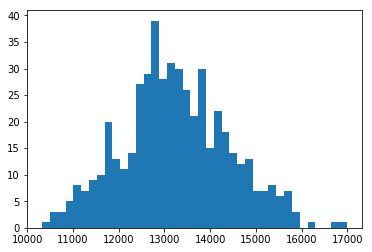

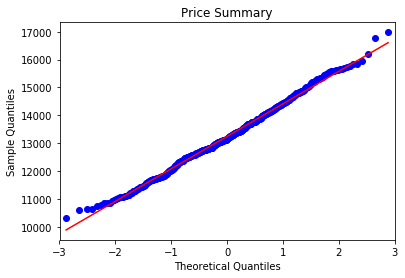

In [34]:
price_means = np.array([
        np.random.choice(auto_price['price'], size=50, replace=True).mean()
        for i in range(500)])

breaks = np.linspace(price_means.min(), price_means.max(), num=40)
_ = plt.hist(price_means, bins=breaks)
_ = sm.qqplot(price_means, line='s')

plt.title('Price Summary')

In [36]:
#classical summary statistics

price_mean = price_means.mean()
price_std = price_means.std()
print('Estimated mean of price (%.3f) vs actual mean of price (%.3f)' % (price_mean, auto_price['price'].mean()))
print('Estimated s.d. of price (%.3f) vs actual s.d. of price (%.3f)' % (price_std, auto_price['price'].std()))

Estimated mean of price (13246.712) vs actual mean of price (13248.015)
Estimated s.d. of price (1166.120) vs actual s.d. of price (8056.330)


In [37]:
#classical confidence interval calculation

alpha = 0.95
half_width = scipy.stats.norm.ppf((1 + alpha)/2, loc=price_mean, scale=price_std) - price_mean
print('The half width is %.2f' % half_width)

ci_low = price_mean - half_width
ci_high = price_mean + half_width

print('The actual mean is %.2f' % auto_price['price'].mean())
print('The %.2f level CI is (%.2f , %.2f)' % (alpha, ci_low, ci_high))

The half width is 2285.55
The actual mean is 13248.02
The 0.95 level CI is (10961.16 , 15532.26)
